In [50]:
import matplotlib
import numpy as np
import cv2
from time import time
from sklearn import manifold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

# Загрузка данных 

In [51]:
X = np.fromfile('mnist/images.dat', dtype = np.uint8)[16:].reshape([-1, 784])

In [52]:
y = np.fromfile('mnist/labels.dat', dtype = np.uint8)[8:]

In [53]:
print('Всего объектов: {}'.format(X.shape[0]))

Всего объектов: 10000


# Пример изображений

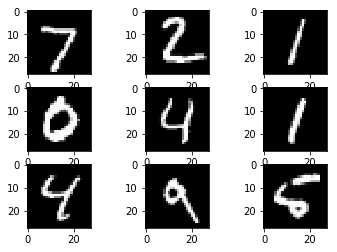

In [54]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X[0].reshape([28,28]), cmap = 'gray')
axarr[0,1].imshow(X[1].reshape([28,28]), cmap = 'gray')
axarr[0,2].imshow(X[2].reshape([28,28]), cmap = 'gray')
axarr[1,0].imshow(X[3].reshape([28,28]), cmap = 'gray')
axarr[1,1].imshow(X[4].reshape([28,28]), cmap = 'gray')
axarr[1,2].imshow(X[5].reshape([28,28]), cmap = 'gray')
axarr[2,0].imshow(X[6].reshape([28,28]), cmap = 'gray')
axarr[2,1].imshow(X[7].reshape([28,28]), cmap = 'gray')
axarr[2,2].imshow(X[8].reshape([28,28]), cmap = 'gray')

In [55]:
n_neighbors = 100
n_components = 10
color_map = [(0,0,0), (1,0,0), (1,1,0),
             (1,0,1), (0,1,0), (0,1,1),
             (0.5,0.5,0.5), (0.25, 0.75, 0.5), (0.75, 0.5, 0.25), (0, 0.75, 0.5)]
color = []
for i in range(X.shape[0]):
    color.append(color_map[y[i]])

In [56]:
cl = RandomForestClassifier()
def accuracy(X, y):
    test_cnt = int(0.1 * X.shape[0])
    cl.fit(X[:-test_cnt], y[:-test_cnt])
    y_predict = cl.predict(X[-test_cnt:])
    return (np.sum(y_predict == y[-test_cnt:]))/float(y_predict.shape[0])

In [57]:
X = X[:5000]
y = y[:5000]

standard: 92 sec
ltsa: 1e+02 sec
hessian: 1.1e+02 sec
modified: 1.2e+02 sec
Isomap: 1.2e+02 sec
MDS: 1.1e+02 sec
SpectralEmbedding: 80 sec


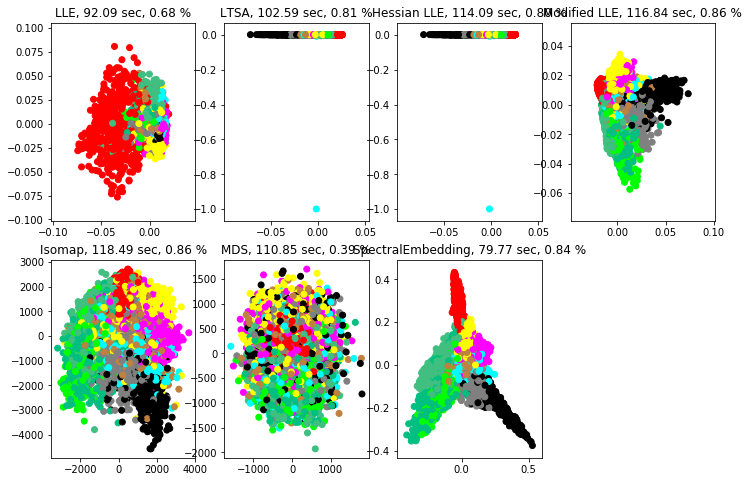

In [58]:
fig = plt.figure(figsize=(15, 8))

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("{}, {:2.2f} sec, {:2.2f} %".format(labels[i], t1 - t0, accuracy(Y, y)))
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap, {:2.2f} sec, {:2.2f} %".format(t1 - t0, accuracy(Y, y)))
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS, {:2.2f} sec, {:2.2f} %".format(t1 - t0, accuracy(Y, y)))
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding, {:2.2f} sec, {:2.2f} %".format(t1 - t0, accuracy(Y, y)))
plt.axis('tight')

plt.show()